In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Define Path for train data and test data
train_dir = 'drive/My Drive/PG AI ML/HumanHorseCNN/Train'
test_dir = 'drive/My Drive/PG AI ML/HumanHorseCNN/Validation/'

In [4]:
# All images will be rescaled by 1./255. The intensities will be in the range of 0 -255
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(128, 128))   
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (128, 128))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [5]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

# Step 1 - Convolution  #No of Feature Maps, Filter, color image with channel,
classifier.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(tf.keras.layers.Flatten())

# Step 4 - Full connection
classifier.add(tf.keras.layers.Dropout(0.3))
classifier.add(tf.keras.layers.Dense(units = 256, activation = 'relu' , kernel_regularizer=tf.keras.regularizers.l1(0.001)))
classifier.add(tf.keras.layers.Dropout(0.3))
classifier.add(tf.keras.layers.Dense(units = 256, activation = 'relu' , kernel_regularizer=tf.keras.regularizers.l1(0.001)))
classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
#Custom Callback
class MyThresholdCallback(tf.keras.callbacks.Callback):
 def __init__(self, cl):
   super(MyThresholdCallback, self).__init__()
   self.cl = cl

 def on_epoch_end(self, epoch, logs=None):
   test_score = logs["val_accuracy"]
   train_score = logs["accuracy"]
   if test_score > train_score and test_score > self.cl:
     self.model.stop_training = True

In [8]:
myR2ScoreMonitor = MyThresholdCallback(cl=0.70)

history = classifier.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=50,   #NumberofImages = BatchSize*StepsPerEpoch
                              epochs=30,
                              validation_steps=12,   #NumberofImages = BatchSize*StepsPerEpoch
                              verbose=2)

Epoch 1/30
50/50 - 87s - loss: 40.4297 - accuracy: 0.4944 - val_loss: 26.9051 - val_accuracy: 0.5042
Epoch 2/30
50/50 - 9s - loss: 40.7264 - accuracy: 0.5025 - val_loss: 27.1640 - val_accuracy: 0.5000
Epoch 3/30
50/50 - 9s - loss: 40.6372 - accuracy: 0.4970 - val_loss: 27.2899 - val_accuracy: 0.5083
Epoch 4/30
50/50 - 9s - loss: 40.8067 - accuracy: 0.5147 - val_loss: 27.2786 - val_accuracy: 0.4958
Epoch 5/30
50/50 - 9s - loss: 40.3994 - accuracy: 0.5167 - val_loss: 27.3261 - val_accuracy: 0.4917
Epoch 6/30
50/50 - 9s - loss: 40.3113 - accuracy: 0.5117 - val_loss: 27.2733 - val_accuracy: 0.4875
Epoch 7/30
50/50 - 9s - loss: 40.2003 - accuracy: 0.4944 - val_loss: 27.2439 - val_accuracy: 0.5042
Epoch 8/30
50/50 - 9s - loss: 40.4202 - accuracy: 0.5198 - val_loss: 27.1520 - val_accuracy: 0.5000
Epoch 9/30
50/50 - 9s - loss: 39.9400 - accuracy: 0.5167 - val_loss: 27.1137 - val_accuracy: 0.4958
Epoch 10/30
50/50 - 9s - loss: 39.7972 - accuracy: 0.5096 - val_loss: 26.9969 - val_accuracy: 0.495

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Human


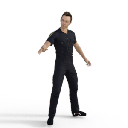

In [9]:
img = tf.keras.preprocessing.image.load_img('drive/My Drive/PG AI ML/HumanHorseCNN/Validation/humans/valhuman01-06.png', target_size=(128,128))
imgArray = tf.keras.preprocessing.image.img_to_array(img)
compatibleImgArray = np.expand_dims(imgArray, axis=0)
imageData = np.vstack([compatibleImgArray])
if classifier.predict_classes(imageData) == 0:
    print('Horse')
else:
    print('Human')

img

Its Human image


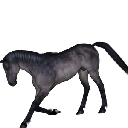

In [10]:
img = tf.keras.preprocessing.image.load_img('drive/My Drive/PG AI ML/HumanHorseCNN/Validation/horses/horse3-055.png', target_size=(128,128))
imgArray = tf.keras.preprocessing.image.img_to_array(img)
compatibleImgArray = np.expand_dims(imgArray, axis=0)
imageData = np.vstack([compatibleImgArray])
if classifier.predict(imageData) == 0:
    print('Its Horse image')
else:
    print('Its Human image')

img

## **Test 1**

In [11]:
#Custom Callback
class MyThresholdCallback(tf.keras.callbacks.Callback):
 def __init__(self, cl):
   super(MyThresholdCallback, self).__init__()
   self.cl = cl

 def on_epoch_end(self, epoch, logs=None):
   test_score = logs["val_acc"]
   train_score = logs["acc"]
   if test_score > train_score and test_score > self.cl:
     self.model.stop_training = True

In [12]:
#Define Path for train data and test data
train_dir = 'drive/My Drive/PG AI ML/HumanHorseCNN/Train'
validation_dir = 'drive/My Drive/PG AI ML/HumanHorseCNN/Validation/'


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

myR2ScoreMonitor = MyThresholdCallback(cl=0.80)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50, 
      epochs=20,
      callbacks= [myR2ScoreMonitor],
      validation_data=validation_generator,
      validation_steps=12,  
      verbose=2)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
50/50 - 9s - loss: 0.4701 - acc: 0.7923 - val_loss: 0.4974 - val_acc: 0.8375


Text(0.5, 1.0, 'Training and validation accuracy')

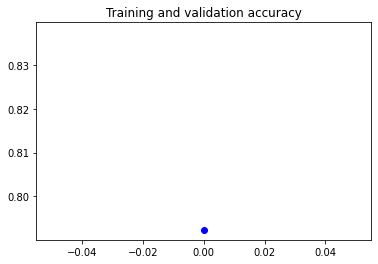

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

Its a Human


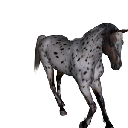

In [14]:
img = tf.keras.preprocessing.image.load_img('drive/My Drive/PG AI ML/HumanHorseCNN/Validation/horses/horse2-040.png', target_size=(128,128))
imgArray = tf.keras.preprocessing.image.img_to_array(img)
compatibleImgArray = np.expand_dims(imgArray, axis=0)
imageData = np.vstack([compatibleImgArray])
if classifier.predict(imageData) == 0:
    print('Its a Horse')
else:
    print('Its a Human')

img

## **Test 2**

In [15]:
#Custom Callback
class MyThresholdCallback(tf.keras.callbacks.Callback):
 def __init__(self, cl):
   super(MyThresholdCallback, self).__init__()
   self.cl = cl

 def on_epoch_end(self, epoch, logs=None):
   test_score = logs["val_acc"]
   train_score = logs["acc"]
   if test_score > train_score and test_score > self.cl:
     self.model.stop_training = True

In [16]:
tf.random.set_seed(2800)
np.random.seed(28000)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1),
              #optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['acc'])


# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

myR2ScoreMonitor = MyThresholdCallback(cl=0.90)

history = model.fit(
      train_generator,
      validation_data=validation_generator,
      steps_per_epoch=50,  # 2000 images = batch_size * steps
      epochs=50,
      callbacks= [myR2ScoreMonitor],
      validation_steps=12,  # 1000 images = batch_size * steps
      verbose=2)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/50
50/50 - 14s - loss: 0.6963 - acc: 0.4944 - val_loss: 0.6865 - val_acc: 0.5042
Epoch 2/50
50/50 - 14s - loss: 0.7115 - acc: 0.5451 - val_loss: 0.6945 - val_acc: 0.4875
Epoch 3/50
50/50 - 14s - loss: 0.6943 - acc: 0.5279 - val_loss: 0.6903 - val_acc: 0.4958
Epoch 4/50
50/50 - 14s - loss: 0.6832 - acc: 0.5441 - val_loss: 0.6920 - val_acc: 0.5042
Epoch 5/50
50/50 - 14s - loss: 0.6927 - acc: 0.5268 - val_loss: 0.6907 - val_acc: 0.5417
Epoch 6/50
50/50 - 14s - loss: 0.6891 - acc: 0.5491 - val_loss: 0.6900 - val_acc: 0.5083
Epoch 7/50
50/50 - 14s - loss: 0.6897 - acc: 0.5491 - val_loss: 0.6934 - val_acc: 0.5042
Epoch 8/50
50/50 - 14s - loss: 0.6931 - acc: 0.5177 - val_loss: 0.6949 - val_acc: 0.5042
Epoch 9/50
50/50 - 14s - loss: 0.6771 - acc: 0.5674 - val_loss: 0.7919 - val_acc: 0.5083
Epoch 10/50
50/50 - 14s - loss: 0.6912 - acc: 0.5603 - val_loss: 0.6895 - val_acc: 0.5083
Epoch 11/50
50/50 - 14s - 

Text(0.5, 1.0, 'Training and validation accuracy')

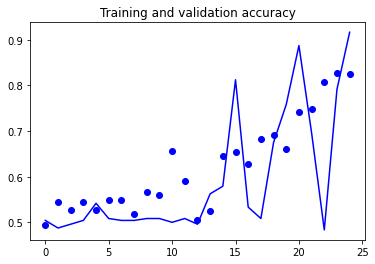

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

Human


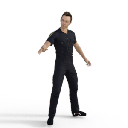

In [18]:
img = tf.keras.preprocessing.image.load_img('drive/My Drive/PG AI ML/HumanHorseCNN/Validation/humans/valhuman01-06.png', target_size=(128,128))
imgArray = tf.keras.preprocessing.image.img_to_array(img)
compatibleImgArray = np.expand_dims(imgArray, axis=0)
imageData = np.vstack([compatibleImgArray])
if classifier.predict_classes(imageData) == 0:
    print('Horse')
else:
    print('Human')

img

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from sklearn import metrics

predictions = model.predict_generator(validation_generator)
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys()) 

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

      horses       0.50      1.00      0.67       128
      humans       0.00      0.00      0.00       128

    accuracy                           0.50       256
   macro avg       0.25      0.50      0.33       256
weighted avg       0.25      0.50      0.33       256



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


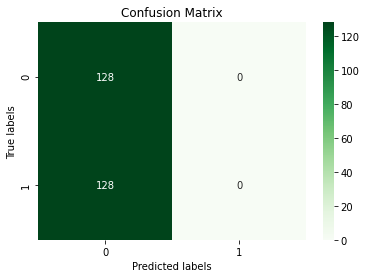

In [29]:
import seaborn as sns

#Plotting Confusion Matrix graph
ax= plt.subplot()
sns.heatmap(confusion_matrix(true_classes,predicted_classes), annot=True, ax = ax, fmt='g', cmap='Greens'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0,1]); ax.yaxis.set_ticklabels([0,1]);

In [30]:
print(classification_report(true_classes,predicted_classes))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       128
           1       0.00      0.00      0.00       128

    accuracy                           0.50       256
   macro avg       0.25      0.50      0.33       256
weighted avg       0.25      0.50      0.33       256



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
